# Imports

In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
import time,os


In [ ]:
df = pd.read_csv('/content/sample_data/heart.csv')

# Exploratory Data Analysis

In [ ]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No Null/Missing data

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


No Flaw in data

In [ ]:
unique_counts = {}
for i in range(df.shape[1]):
    unique_counts[df.iloc[:,i].name] = len(pd.unique(df.iloc[:,i]))

print("Unique value counts:")
pd.Series(unique_counts)

Unique value counts:


age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#Data Cleaning

Null Value Insertion

In [ ]:
df['weight'] = [np.nan]*len(df)
#generates random number in weight feature
for i in range(len(df)):
    random_number = random.randint(1,1000)
    if random_number ==1:
        df.loc[i,'weight']=random.randint(1,100)

Null Value Checking

In [ ]:
#Null value checking
df.isnull().sum()

age           0
sex           0
cp            0
trtbps        0
chol          0
fbs           0
restecg       0
thalachh      0
exng          0
oldpeak       0
slp           0
caa           0
thall         0
output        0
weight      303
dtype: int64

Droping Weight Column to eliminate Null values

In [ ]:
df = df.drop(['weight'],axis=1)

Null value checking after dropping

In [ ]:
#Null value checking
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**DATA CLEANING IS DONE**

In [ ]:
from collections import Counter
Counter(df["output"])

Counter({1: 165, 0: 138})

There is a slight imbalance in the dataset

# Visualization

#### Is sex and age related to chest pain?

<ipython-input-226-6a7e97764742>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'sex',y = 'age',hue = 'cp',data = df,ci=None)


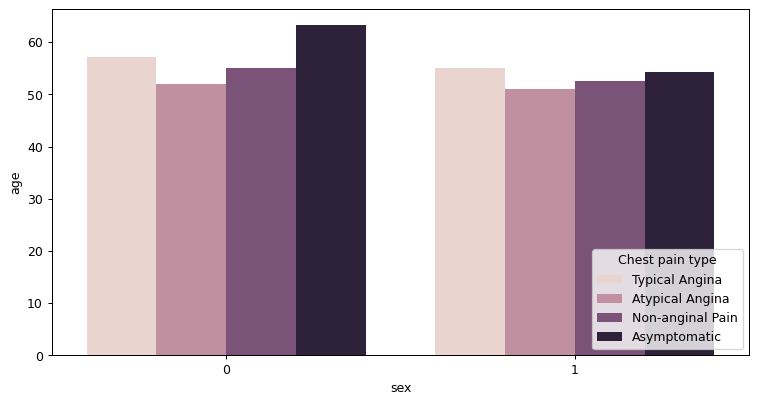

In [ ]:
plt.figure(figsize=(10, 5), dpi = 90)

sns.barplot(x = 'sex',y = 'age',hue = 'cp',data = df,ci=None)
plt.legend(title='Chest pain type', loc='lower right',
           labels=["Typical Angina", "Atypical Angina","Non-anginal Pain", "Asymptomatic"])
plt.show()

=> No sex isn't related, But people around the age 60 does have increased rate of Typical Angina and Asymptomatic chest pain

#### Does age effect cholestrol level?

<ipython-input-227-2aa7b3756b8f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="age", y="chol", data=df,ci=None)


<Axes: xlabel='age', ylabel='chol'>

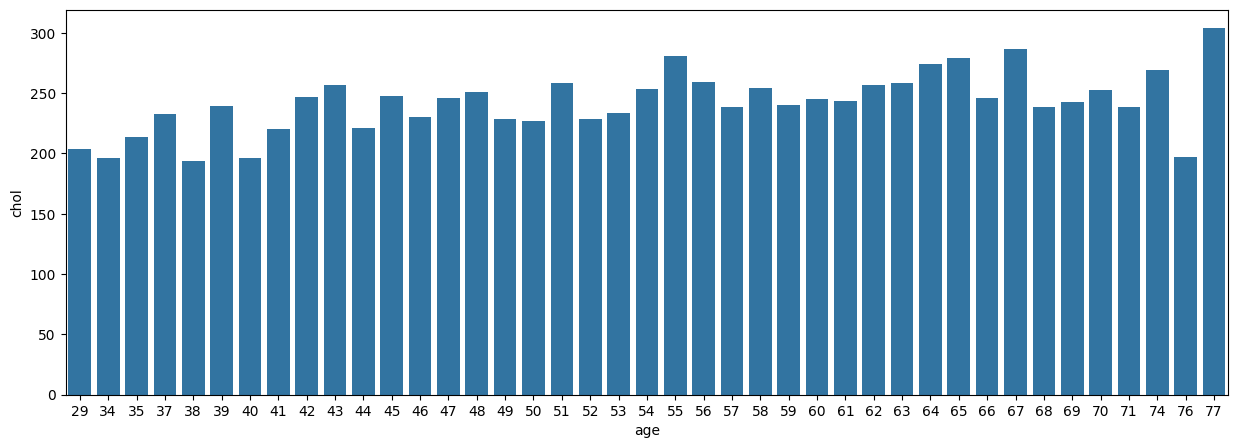

In [ ]:
plt.figure(figsize=(15, 5), dpi = 100)
sns.barplot(x="age", y="chol", data=df,ci=None)

=> chol does increases slightly with age

#### Does age effect resting blood pressure?

<ipython-input-228-29f4f45fd9b7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="age", y="trtbps", data=df,ci=None, color="#21618C")


<Axes: xlabel='age', ylabel='trtbps'>

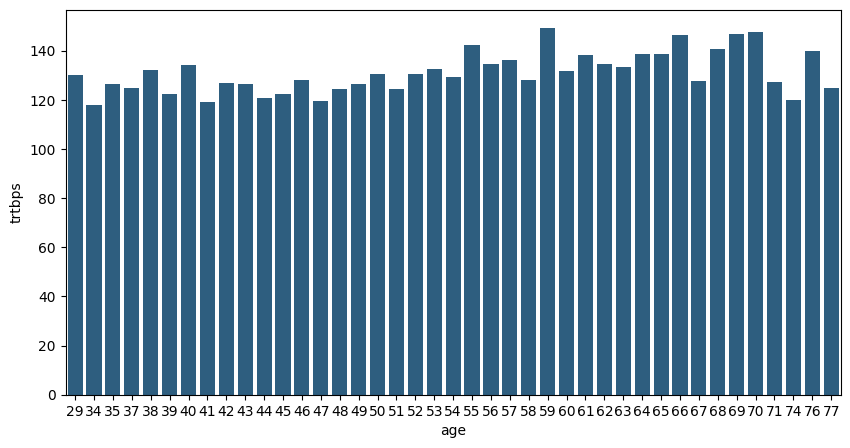

In [ ]:
plt.figure(figsize=(10, 5), dpi = 100)
sns.barplot(x="age", y="trtbps", data=df,ci=None, color="#21618C")

=> resting blood pressure does increase after 50

#### Does maximum heart rate have anything to do with age?

<ipython-input-229-ae7d47a651af>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="age", y="thalachh", data=df,ci=None, color="#239B56")


<Axes: xlabel='age', ylabel='thalachh'>

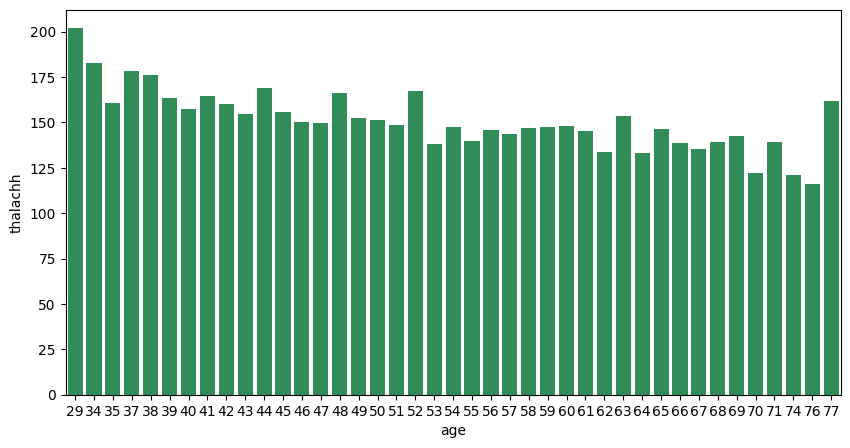

In [ ]:
plt.figure(figsize=(10, 5), dpi = 100)
sns.barplot(x="age", y="thalachh", data=df,ci=None, color="#239B56")

=> maximum heart rate decreases with aging

#### Does number of major vessles have any relation to age and sex

<ipython-input-230-b33cdae6cdf8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'sex',y = 'age',hue = 'caa',data = df,ci=None)


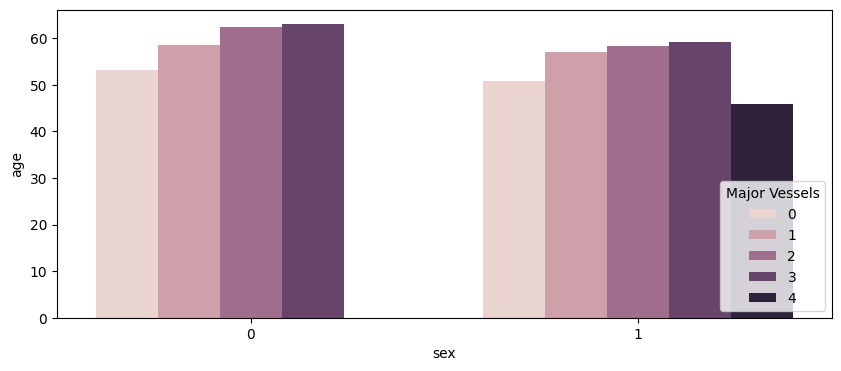

In [ ]:
plt.figure(figsize=(10, 4), dpi = 100)
sns.barplot(x = 'sex',y = 'age',hue = 'caa',data = df,ci=None)
plt.legend(title='Major Vessels', loc='lower right')
plt.show()

=> major vessle does increase with age but it doesn't have any relation with sex

#### Does age have anything to do with heart attack?

Text(0.5, 1.0, 'Age-Gaussian Distribution')

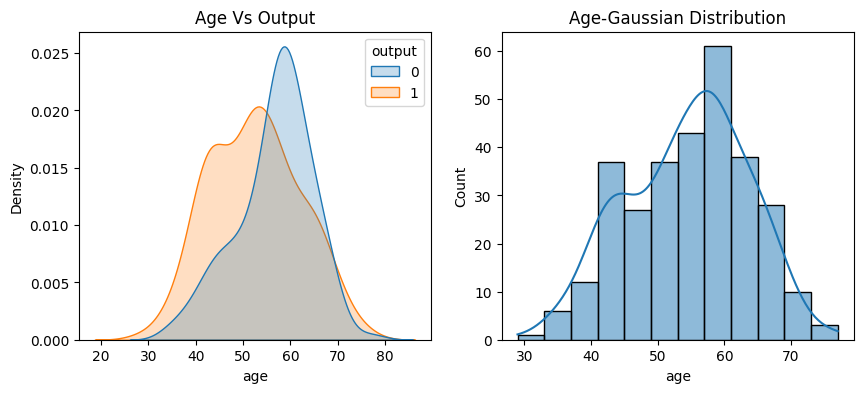

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi = 100)

sns.kdeplot(data=df, x="age", hue="output", fill=True, ax=axes[0]).set_title("Age Vs Output")

sns.histplot(df["age"], kde=True, ax=axes[1]).set_title("Age-Gaussian Distribution")

=>

*people around the age of 60 does have a increased rate of heart attack.

*people around the age of 40 does have a decreased rate of heart attack.

***But the original dataset does have a lot of people around the age of 45 and 57 so this information could be biased

#### Does sex effect output?

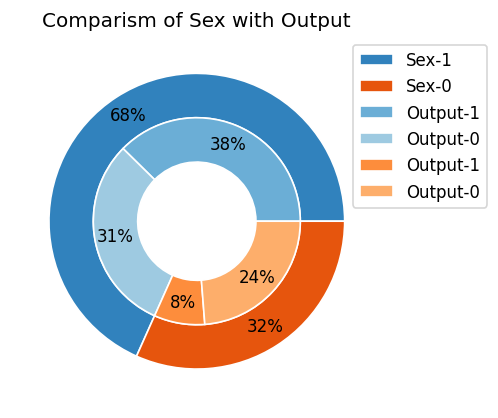

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4), dpi = 120)

size = 0.3
vals = np.array([pd.Series.tolist(df[df["sex"] == 1]["output"].value_counts().sort_index()),
                 pd.Series.tolist(df[df["sex"] == 0]["output"].value_counts().sort_index())])

cmap = plt.get_cmap("tab20c")
outer_colors = ["#3182bd","#e6550d"]
inner_colors = ["#6baed6","#9ecae1",'#fd8d3c',"#fdae6b"]

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,autopct='%1.0f%%',pctdistance=.85,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,autopct='%1.0f%%',pctdistance=.80,
       wedgeprops=dict(width=size, edgecolor='w'))

plt.legend(labels=["Sex-1", "Sex-0", "Output-1","Output-0","Output-1","Output-0"], bbox_to_anchor=(.9,1))
ax.set(title='Comparism of Sex with Output')
plt.show()

=> Inconclusive because the ratio of male female is not equal

#### Does exercise induced angina cause heart attack?

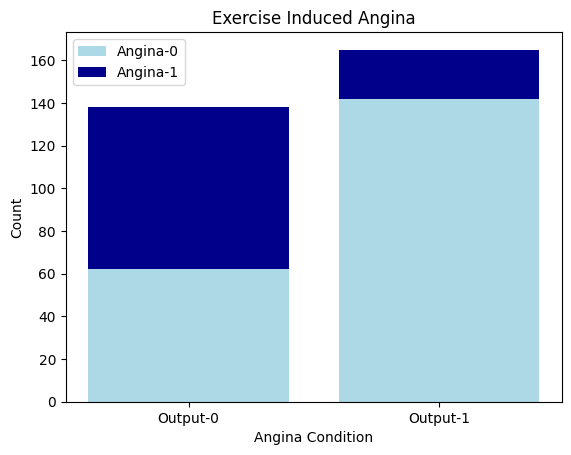

In [ ]:
x = ['Output-0', 'Output-1']
y1 = [df[df["exng"] == 0]["output"].value_counts().loc[0],df[df["exng"] == 0]["output"].value_counts().loc[1]]
y2 = [df[df["exng"] == 1]["output"].value_counts().loc[0],df[df["exng"] == 1]["output"].value_counts().loc[1]]

plt.bar(x, y1, color='lightblue')
plt.bar(x, y2, bottom=y1, color='darkblue')


plt.title('Exercise Induced Angina')
plt.xlabel('Angina Condition')
plt.ylabel('Count')
plt.legend(["Angina-0","Angina-1"])
plt.show()

=> People without agina-0 does have increased rate of heart attack

#### Does age and oldpeak have any relation?

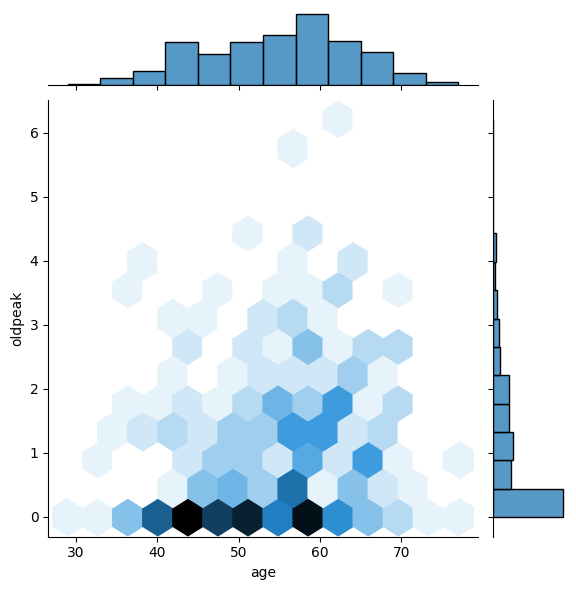

In [ ]:
sns.jointplot(x = df['age'], y = df['oldpeak'],kind = 'hex')

=>

*oldpeak is maximum around 0

*The relation between oldpeak and age is mostly dense around the age 40-60

***But the original dataset does have a lot of people around the age of 40 to 60 and olpeak around 0 so this information could be biased

#### Does age have anything to do with fbs?

<Axes: xlabel='fbs', ylabel='age'>

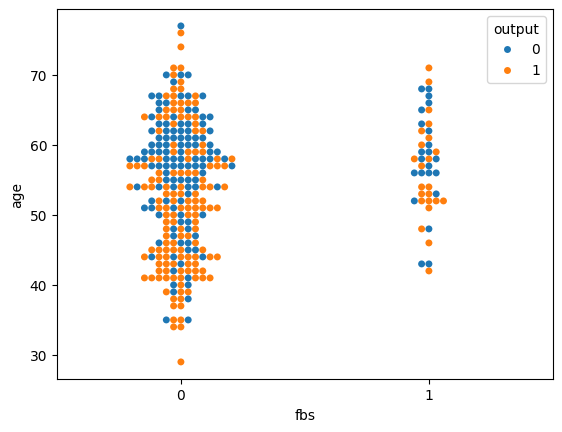

In [ ]:
sns.swarmplot(y = df['age'], x = df['fbs'],hue= df["output"])

=>

*fbs data is imbalanced. "0" takes 85% of fbs

*People with fbs-0 peaks around the age 50-60

# Feature Selection

In [ ]:
X = df.drop(["output"],axis=1)
y = df["output"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X,y)

RandomForestClassifier()

In [ ]:
forest.feature_importances_

array([0.07366794, 0.03472288, 0.13475732, 0.07457634, 0.0774442 ,
       0.00928156, 0.02032641, 0.12331189, 0.06067595, 0.11153437,
       0.04756339, 0.12020105, 0.11193671])

<Axes: ylabel='None'>

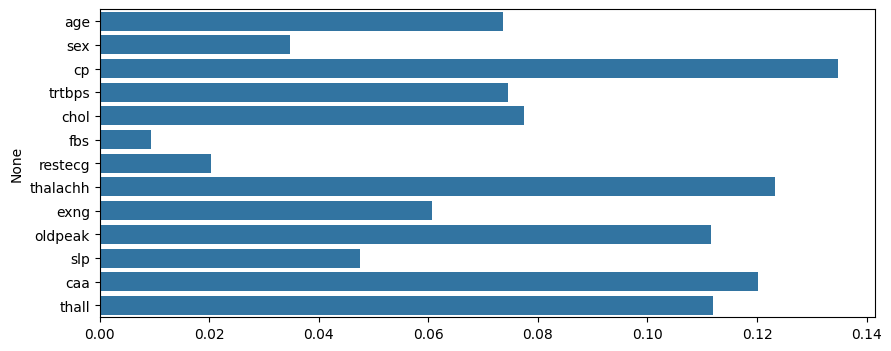

In [ ]:
plt.figure(figsize=(10, 4), dpi = 100)
sns.barplot(y=X.columns, x=forest.feature_importances_)

<Axes: >

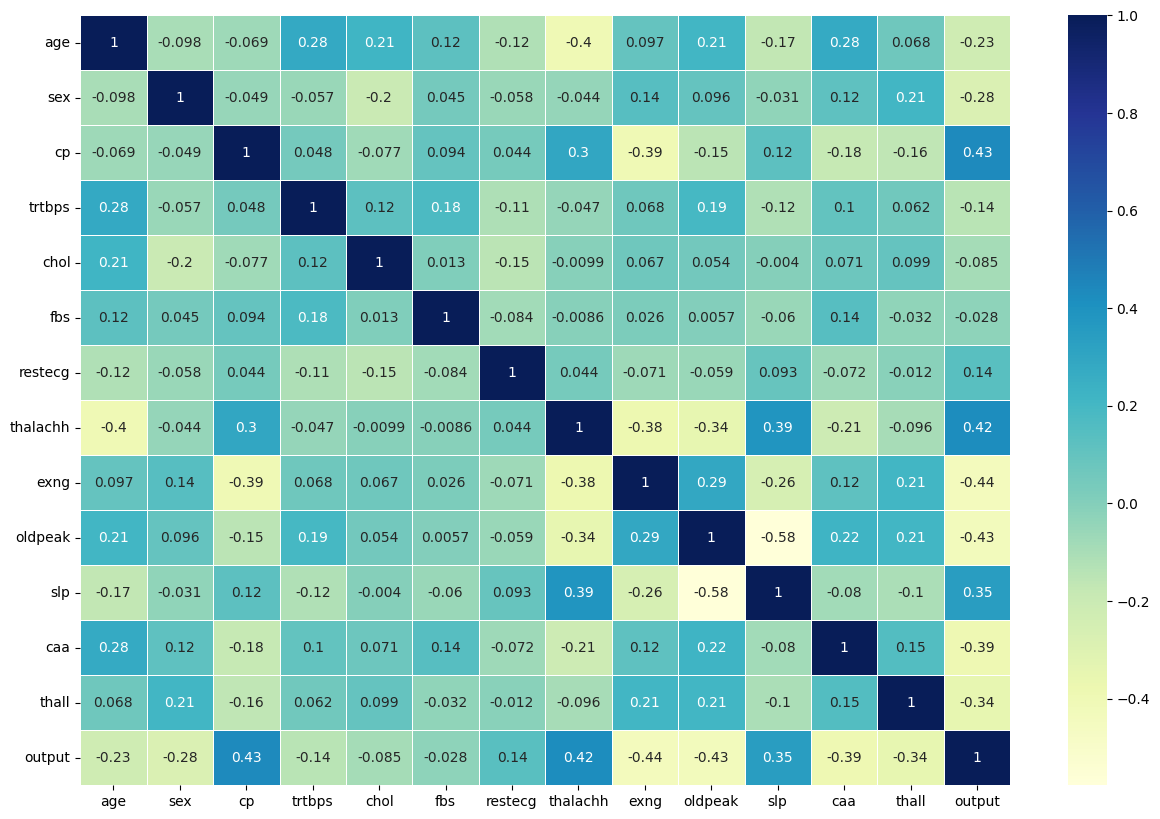

In [ ]:
plt.figure(figsize=(15, 10), dpi = 100)
sns.heatmap(df.corr(),annot=True, linewidths=.5,cmap="YlGnBu")

values in the row "fbs" and "restecg" seems to close to 0

It also had low score from random forest feature selection meaning this two column can be removed

# Data Preprocessing

In [ ]:
X = df.drop(["output","fbs","restecg"],axis=1)
y = df["output"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Model Training

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
def custom_nn(hidden_layer_nodes,activations,dropout_nodes ,epoch_num,output_act,batch_size):
    save_loc = ""

    hidden_layers = len(hidden_layer_nodes)

    if hidden_layers != len(dropout_nodes):
        print("Parameter Mismatch : hidden_layers and dropout_nodes length does not match")
        print("Add 0 to not use dropout")
        sys.exit(1)

    model = keras.models.Sequential()
    model.add(keras.layers.Flatten())

    for i in range(hidden_layers):
        model.add(keras.layers.Dense(hidden_layer_nodes[i], activation = activations[i],
                                    kernel_initializer=tf.keras.initializers.HeNormal(seed=0)))
        if dropout_nodes[i] != 0:
            model.add(Dropout(dropout_nodes[i]))

    model.add(keras.layers.Dense(len(y.value_counts()), activation = output_act))

    model_name = "{}-dense_{}-nodes_{}-drop_{}-act_{}-outact_{}-epoch_{}-batch".format(hidden_layers,hidden_layer_nodes,
                                                                    dropout_nodes,activations,output_act,epoch_num,batch_size)

    if os.path.isdir(save_loc+model_name):
        model_name = model_name + str(int(time.time()))

    tensorboard = TensorBoard(log_dir="logs/{}".format(model_name))

    model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

    history = model.fit(X_train, y_train,batch_size=batch_size, validation_data = (X_test, y_test),
              epochs = epoch_num, callbacks =[tensorboard])

    print()
    print(model.summary())
    print()

    print()
    print('Model Saved-')
    model.save(save_loc+model_name)
    print("Tensorboard event saved as : " + model_name)

    model.evaluate(X_train, y_train)
    model.evaluate(X_test, y_test)
    return model, history

In [ ]:

model,history = custom_nn([50,50,200],["relu","relu","sigmoid"],[0.2,0.2,0],20,"softmax",32)

Epoch 1/20
8/8 [==============================] - 1s 34ms/step - loss: 0.6243 - accuracy: 0.6901 - val_loss: 0.5124 - val_accuracy: 0.7869
Epoch 2/20
8/8 [==============================] - 0s 8ms/step - loss: 0.5458 - accuracy: 0.7231 - val_loss: 0.4132 - val_accuracy: 0.8361
Epoch 3/20
8/8 [==============================] - 0s 10ms/step - loss: 0.4600 - accuracy: 0.8058 - val_loss: 0.3675 - val_accuracy: 0.8525
Epoch 4/20
8/8 [==============================] - 0s 10ms/step - loss: 0.4504 - accuracy: 0.7645 - val_loss: 0.3488 - val_accuracy: 0.8525
Epoch 5/20
8/8 [==============================] - 0s 10ms/step - loss: 0.3947 - accuracy: 0.8223 - val_loss: 0.3415 - val_accuracy: 0.8525
Epoch 6/20
8/8 [==============================] - 0s 11ms/step - loss: 0.4200 - accuracy: 0.8223 - val_loss: 0.3301 - val_accuracy: 0.8525
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 0.4188 - accuracy: 0.8017 - val_loss: 0.3409 - val_accuracy: 0.8689
Epoch 8/20
8/8 [=============

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
print(history)

In [ ]:
from keras.models import load_model

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 11)                0         
                                                                 
 dense_16 (Dense)            (None, 50)                600       
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_17 (Dense)            (None, 50)                2550      
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_18 (Dense)            (None, 200)               10200     
                                                                 
 dense_19 (Dense)            (None, 2)                

# Performance Evaluation

In [ ]:
print("Training Score:")
model.evaluate(X_train, y_train)

Training Score:
8/8 [==============================] - 0s 3ms/step - loss: 0.2851 - accuracy: 0.8967


[0.28505241870880127, 0.8966942429542542]

In [ ]:
print("Testing Score:")
model.evaluate(X_test, y_test)

Testing Score:
2/2 [==============================] - 0s 7ms/step - loss: 0.3325 - accuracy: 0.8852


[0.3325461149215698, 0.8852459192276001]

In [ ]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
y_pred

array([[0.9523776 , 0.04762236],
       [0.42328218, 0.57671785],
       [0.2318622 , 0.7681378 ],
       [0.96012455, 0.03987543],
       [0.04043768, 0.9595623 ],
       [0.12300412, 0.876996  ],
       [0.24918008, 0.75081986],
       [0.9934134 , 0.00658655],
       [0.98911154, 0.01088842],
       [0.3649585 , 0.6350414 ],
       [0.2097799 , 0.7902202 ],
       [0.9744513 , 0.02554864],
       [0.07904729, 0.9209527 ],
       [0.98483145, 0.01516858],
       [0.01945568, 0.9805444 ],
       [0.02359293, 0.97640705],
       [0.01708798, 0.982912  ],
       [0.9658408 , 0.03415908],
       [0.9896541 , 0.01034592],
       [0.9835637 , 0.01643619],
       [0.43083134, 0.5691687 ],
       [0.9820366 , 0.01796335],
       [0.88117933, 0.11882064],
       [0.41706485, 0.5829352 ],
       [0.03978066, 0.9602193 ],
       [0.3681682 , 0.63183177],
       [0.08562574, 0.9143742 ],
       [0.32984552, 0.6701545 ],
       [0.98662305, 0.01337692],
       [0.03981813, 0.9601819 ],
       [0.

In [ ]:
y_pred = np.array([np.argmax(i) for i in y_pred])

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
con_mat =confusion_matrix(y_test,y_pred,labels=y.unique())

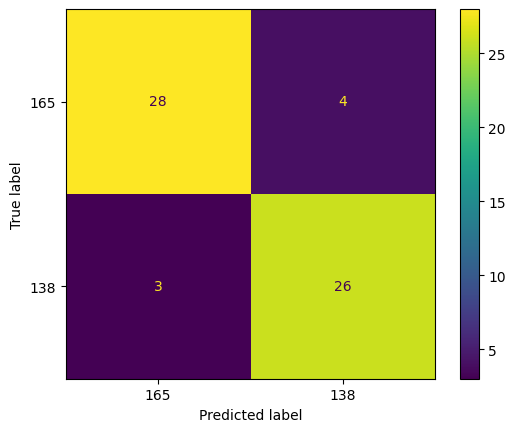

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=y.value_counts()).plot()
plt.show()

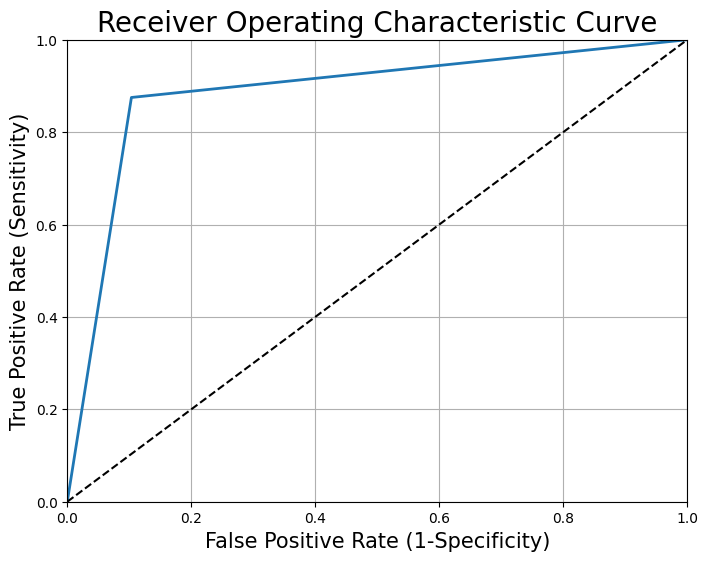

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (1-Specificity)', fontsize=15)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
    plt.title('Receiver Operating Characteristic Curve',fontsize=20)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

The origin point(0,0) is the threshold where TPR and FPR is 0%

The Blue line is the ROC curve of my model

TPR and FPR for my model is same and above 80% meaning this model is good at both positive label classification and negative label classification

In the pointy area the model correctly classifies around 85% of both positive and negative classes

This pointy area would be the optimal threshold

### Train-Test Error and Accuracy

These graphs are generated using tensorboard. To use tensorboard run teh following command on cmd on current working directory-

##### tensorboard --logdir logs

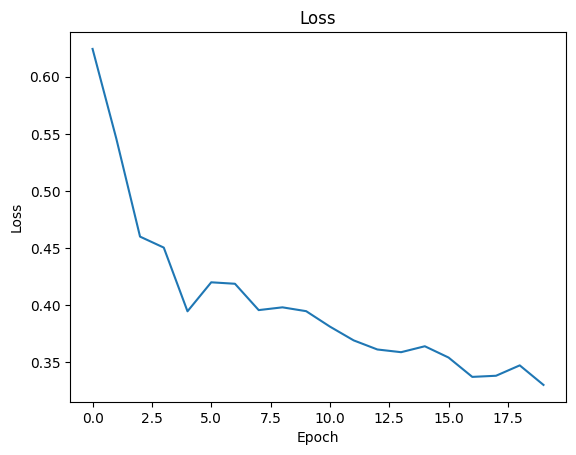

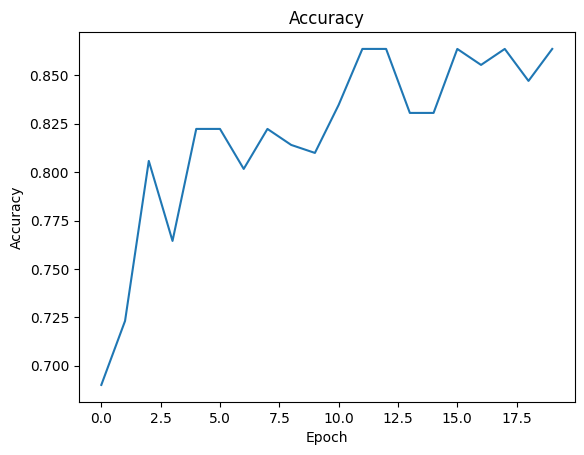

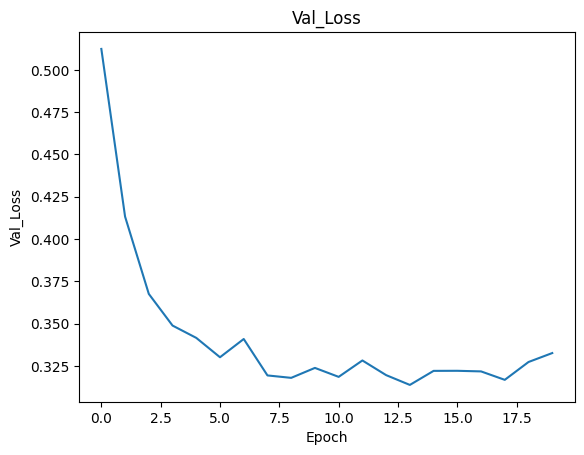

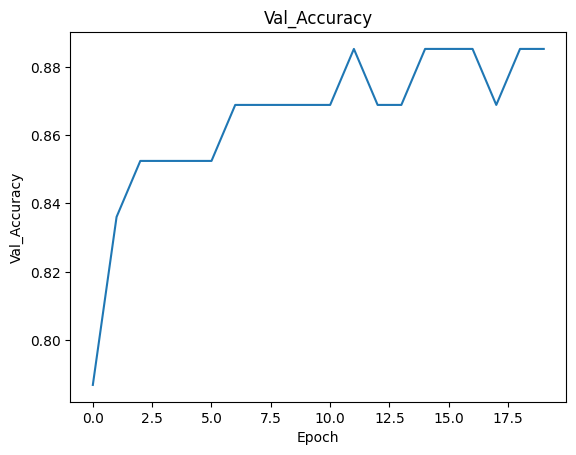

In [ ]:
#print(report)
metrics = history.history.keys()

for m in list(metrics):
    plt.plot(history.history[m])
    plt.title(m.title())
    plt.ylabel(m.title())
    plt.xlabel('Epoch')
    # plt.savefig(os.path.join(GRAPH_ROOT + model_name, m+'.jpeg'))
    plt.show()